In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
# Load Titanic dataset (update the path if running in Colab/Kaggle)
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Shape: (891, 12)

Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


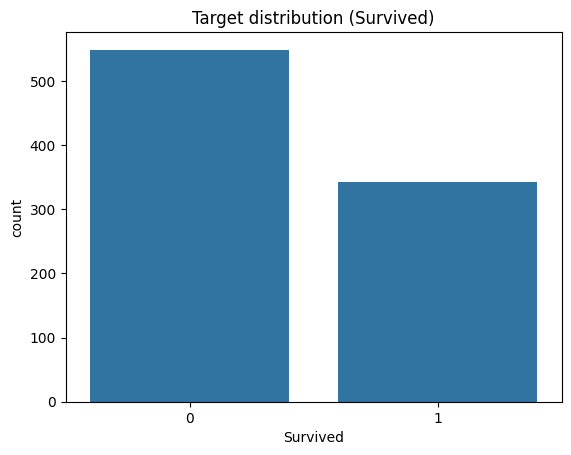

In [4]:
print("Shape:", train_df.shape)
print("\nMissing values:")
print(train_df.isnull().sum())

sns.countplot(x="Survived", data=train_df)
plt.title("Target distribution (Survived)")
plt.show()

In [5]:

# Select useful features
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
target = "Survived"

X = train_df[features]
y = train_df[target]

# Handle missing values
X["Age"].fillna(X["Age"].median(), inplace=True)
X["Embarked"].fillna(X["Embarked"].mode()[0], inplace=True)

# Column types
num_features = ["Age", "Fare", "SibSp", "Parch"]
cat_features = ["Pclass", "Sex", "Embarked"]

# Preprocessor
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
])


/tmp/ipython-input-378325654.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X["Age"].fillna(X["Age"].median(), inplace=True)
/tmp/ipython-input-378325654.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Age"].fillna(X["Age"].median(), inplace=True)
/tmp/ipython-input-378325654.py:10: FutureWarning: A value is trying to be set on a c

In [6]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)


In [7]:

models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=300, random_state=42),
    "MLP (Neural Net)": MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
}

results = {}

for name, clf in models.items():
    pipe = Pipeline(steps=[("preprocess", preprocessor), ("clf", clf)])
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    proba = pipe.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, preds)
    auc = roc_auc_score(y_test, proba)
    results[name] = {"accuracy": acc, "auc": auc, "report": classification_report(y_test, preds)}

    print(f"=== {name} ===")
    print("Accuracy:", acc)
    print("AUC:", auc)
    print(classification_report(y_test, preds))
    print()


=== Logistic Regression ===
Accuracy: 0.7757847533632287
AUC: 0.8415803768460364
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       137
           1       0.72      0.67      0.70        86

    accuracy                           0.78       223
   macro avg       0.76      0.76      0.76       223
weighted avg       0.77      0.78      0.77       223


=== Random Forest ===
Accuracy: 0.7847533632286996
AUC: 0.8171363096248515
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       137
           1       0.75      0.66      0.70        86

    accuracy                           0.78       223
   macro avg       0.78      0.76      0.77       223
weighted avg       0.78      0.78      0.78       223


=== MLP (Neural Net) ===
Accuracy: 0.8026905829596412
AUC: 0.815863181123748
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       137
  

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


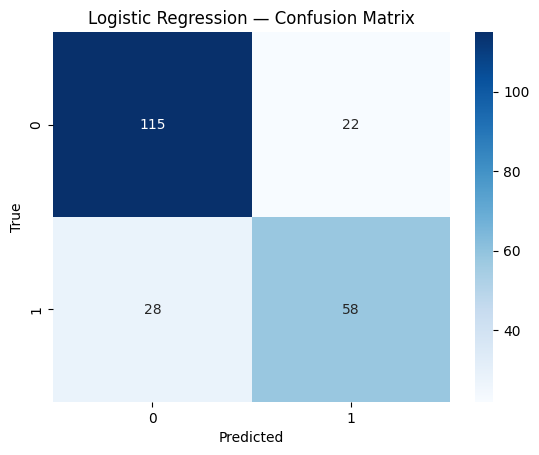

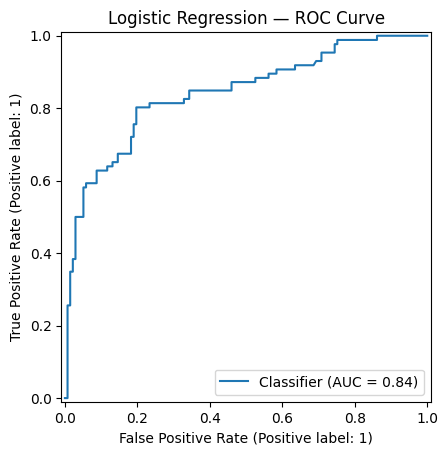

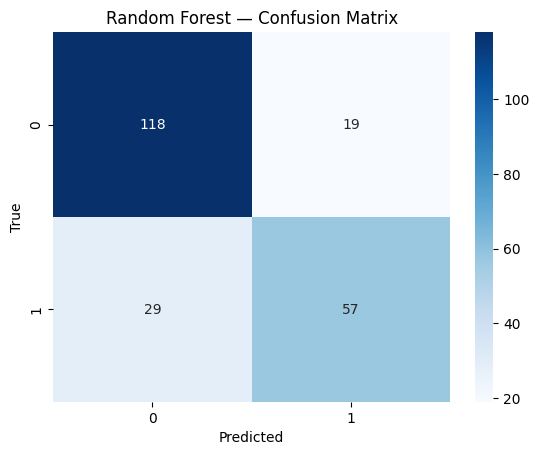

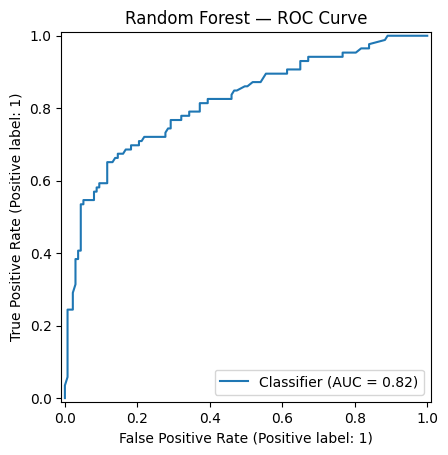

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


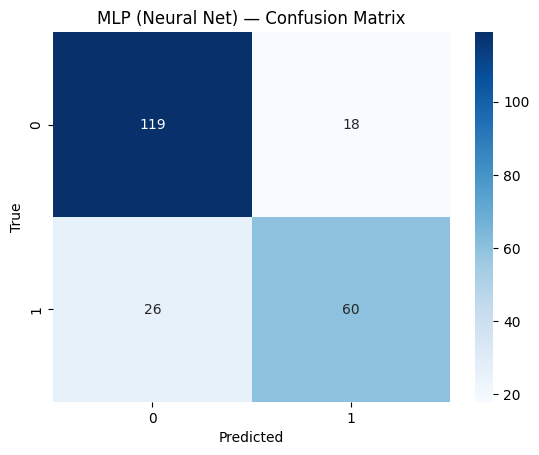

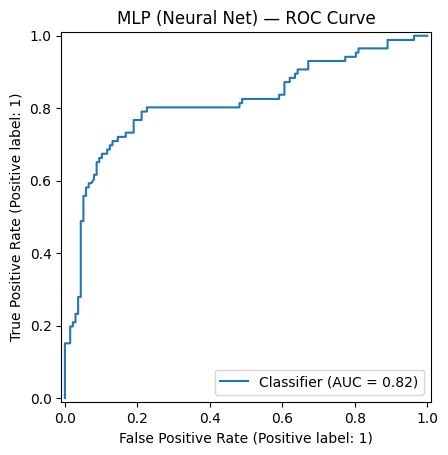

In [8]:

for name, clf in models.items():
    pipe = Pipeline(steps=[("preprocess", preprocessor), ("clf", clf)])
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    proba = pipe.predict_proba(X_test)[:, 1]

    # Confusion matrix
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} — Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # ROC curve
    RocCurveDisplay.from_predictions(y_test, proba)
    plt.title(f"{name} — ROC Curve")
    plt.show()
